Задание 2:
Вы должны разработать скрипт на Python для парсинга таблиц с веб-сайтов.
Требования:
1. Скрипт должен принимать входной URL веб-страницы с таблицей.
2. Скрипт может использовать библиотеку requests для получения HTML-кода страницы.
3. Скрипт может использовать библиотеку BeautifulSoup для парсинга HTML и извлечения таблицы.
Допускается использование selenium.
4. Данные из таблицы должны быть извлечены и сохранены в формате Excel с использованием библиотек openpyxl или pandas.
5. Второй сайт является необязательным заданием, но будет плюсом. Если необходимо загрузить что-то с сайта, то это не обязательно оформлять в формате кода, но описать, как это можно сделать.
Допускается использование библиотек на ваше усмотрение. 

*Второй сайт:
Необходимо собрать данные с графика и выгрузить в эксель. 
"Last 12 readings" заменить на "Last 120 readings"

https://www.fxempire.com/macro/india/gasoline-prices

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

from io import BytesIO
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from datetime import datetime

In [2]:
def format_time(date_str):
    datetime_obj = datetime.strptime(date_str, "%b %d")
    return datetime_obj.strftime("%b %d")

def format_df(df):
    df['Date'] = df['formattedDate'].apply(format_time)
    df = df.rename(columns = {'formattedDate': 'Date (str)', 'close': 'Close',
                              'formattedClose': 'Close (str)'})
    df.drop('timestamp', axis=1, inplace=True)
    df = df[['Date (str)', 'Close (str)', 'Date', 'Close']]
    return df

def extract_chart_data(url, headers, path_to_save_xlxs):
    result_file = f'{path_to_save_xlxs}/output_2.xlsx'
    parts = url.split('/')
    country, product = parts[-2], parts[-1]
    api_url = f'https://www.fxempire.com/api/v1/en/macro-indicators/{country}/{product}/history?latest=120&frequency=Monthly'
    data = requests.get(api_url, headers=headers).json()
    df = pd.json_normalize(data)
    df = format_df(df)
    
    df.to_excel(result_file, index=False, engine='openpyxl')
    return (df, result_file)
    
    
path_to_save = r'C:\Users\Stepan\ТЭК\Task_2'
base_url = 'https://www.fxempire.com/macro/india/gasoline-prices'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0'}

df, xlsx_file = extract_chart_data(base_url, headers, path_to_save)
df

,Date (str),Close (str),Date,Close
0,Dec 06,1.01,Dec 06,1.01
1,Dec 08,1.09,Dec 08,1.09
2,Dec 10,1.15,Dec 10,1.15
3,Dec 12,1.25,Dec 12,1.25
4,Mar 13,1.32,Mar 13,1.32
...,...,...,...,...
115,Aug 23,1.17,Aug 23,1.17
116,Sep 23,1.16,Sep 23,1.16
117,Oct 23,1.16,Oct 23,1.16
118,Nov 23,1.16,Nov 23,1.16


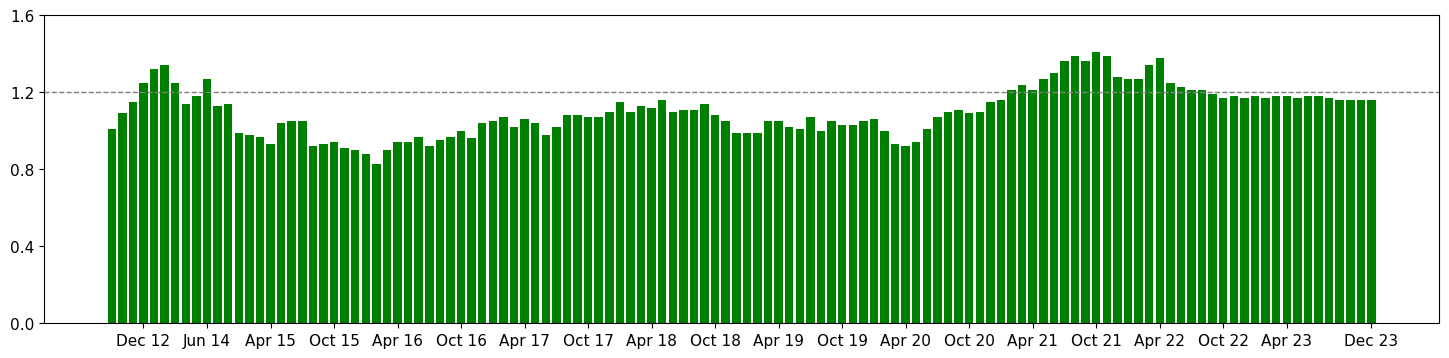

In [3]:
dates = ['Dec 12', 'Jun 14', 'Apr 15', 'Oct 15', 'Apr 16', 'Oct 16', 'Apr 17', 'Oct 17', 
         'Apr 18', 'Oct 18', 'Apr 19', 'Oct 19', 'Apr 20', 'Oct 20', 'Apr 21', 'Oct 21', 
         'Apr 22', 'Oct 22', 'Apr 23', 'Dec 23']
closes = [0, 0.40, 0.80, 1.20, 1.60]
plt.figure(figsize=(18, 4))  # Изменение размера графика
plt.bar(df['Date'], df['Close'], color='green')
plt.xticks(dates, fontsize=11)
plt.yticks(closes, fontsize=11)
plt.axhline(y=1.2, color='gray', linestyle='--', linewidth=1)


buffer = BytesIO()
plt.savefig(buffer, format='png')
buffer.seek(0)

wb = load_workbook(xlsx_file)
ws = wb.active
ws_new = wb.create_sheet(title='Гистограмма')
img = Image(buffer)

ws_new.add_image(img, 'A1')
wb.save(xlsx_file)

plt.show()
